In [1]:
# this notebook will recreate the Phillips figure
# and add Allison Pfeiffer's Be10 data over it

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# start by importing phillips data (already filtered in Excel)
global_data = pd.read_excel('phillips_data_clean.xlsx')

# next import pfeiffer 2017 Be-10 data
pfeiffer_data_Be10 = pd.read_excel('pfeiffer Be phillips overlap.xlsx')

# and the general pfeiffer 2017 data
pfeiffer_data = pd.read_excel('pfeiffer phillips overlap.xlsx')

In [4]:
# add dimensionless values to Phillips and Pfeiffer datasets

# some values
R = 2.65
g = 9.81

# add some columns
global_data['Nondim W'] = global_data['Width (m)']/global_data['D50 (m)']
global_data['Nondim D'] = global_data['Depth (m)']/global_data['D50 (m)']
global_data['Nondim Q'] = global_data['Discharge (m3/s)']/(np.sqrt(R * g * (global_data['D50 (m)']**5)))

# add some columns
pfeiffer_data_Be10['Nondim W'] = pfeiffer_data_Be10['Width (m)']/pfeiffer_data_Be10['D50 (m)']
pfeiffer_data_Be10['Nondim D'] = pfeiffer_data_Be10['Depth (m)']/pfeiffer_data_Be10['D50 (m)']
pfeiffer_data_Be10['Nondim Q'] = pfeiffer_data_Be10['Discharge (m3/s)']/(np.sqrt(R * g * (pfeiffer_data_Be10['D50 (m)']**5)))

# add some columns
pfeiffer_data['Nondim W'] = pfeiffer_data['Width (m)']/pfeiffer_data['D50 (m)']
pfeiffer_data['Nondim D'] = pfeiffer_data['Depth (m)']/pfeiffer_data['D50 (m)']
pfeiffer_data['Nondim Q'] = pfeiffer_data['Discharge (m3/s)']/(np.sqrt(R * g * (pfeiffer_data['D50 (m)']**5)))

In [5]:
# create new sub-datasets from tau ratio data for erosion rates
low_tau = pfeiffer_data_Be10.loc[[0, 3, 5], :]
lowmed_tau = pfeiffer_data_Be10.loc[[1, 6, 8], :]
highmed_tau = pfeiffer_data_Be10.loc[[7], :]
high_tau = pfeiffer_data_Be10.loc[[2, 4, 9], :]

In [6]:
# display full dataframe
pd.set_option("max_rows", None)

# round tau ratio
# pfeiffer_data.round({'tau_*bf / tau_*c': 2})

pfeiffer_data

,ID,Citation,Site_Name,tau_*bf,Slope,D50 (m),Width (m),Depth (m),Discharge (m3/s),State/Province,tau_*c,tau_*bf / tau_*c,Nondim W,Nondim D,Nondim Q
0,1632,"Williams, 1978","Nestucca River near Beaver, OR",0.003422,0.000210,0.045000,39.600000,1.210000,70.800000,OR,0.018057,0.189523,880.000000,26.888889,3.232545e+04
1,1640,"Williams, 1978","Row River above Pitcher Creek near Dorena, OR",0.004909,0.000540,0.072000,34.100000,1.080000,11.300000,OR,0.022866,0.214690,473.611111,15.000000,1.593271e+03
2,915,"King et al., 2004; Mueller et al., 2005",JOHNSON CREEK AT YELLOW PINE ID,0.012887,0.004000,0.190000,24.000000,1.010000,39.700000,ID,0.037723,0.341615,126.315789,5.315789,4.948221e+02
3,918,"King et al., 2004; Mueller et al., 2005",North Fork Clearwater River near Canyon Ranger...,0.008868,0.000500,0.095000,84.000000,2.780000,453.000000,ID,0.022430,0.395342,884.210526,29.263158,3.193977e+04
4,734,"Foster, 2012","Jack Creek above Coyote Draw, near Saratoga, WY",0.013022,0.002000,0.036600,26.822400,0.393192,5.720003,WY,0.031721,0.410507,732.852459,10.742951,4.377600e+03
5,1119,"Messinger, 2009","Sand Run near Buckhannon, WV",0.018972,0.006000,0.105156,15.636240,0.548640,11.326739,WV,0.041747,0.454456,148.695652,5.217391,6.195299e+02
6,112,"Chaplin, 2005",Lycoming Creek near Trout Run Pa.,0.015995,0.003000,0.133000,61.600000,1.170000,133.900000,PA,0.035105,0.455617,463.157895,8.796992,4.070934e+03
7,878,"Kellerhals et al., 1972",Bow River at Lake Louise,0.018829,0.003500,0.089000,44.000000,0.790000,53.000000,"Alberta, Canada",0.036484,0.516075,494.382022,8.876404,4.398893e+03
8,108,"Chaplin, 2005",Little Mahoning Creek at McCormick Pa.,0.013917,0.001000,0.067500,30.500000,1.550000,59.300000,PA,0.026674,0.521738,451.851852,22.962963,9.825119e+03
9,832,"Keaton et al., 2005",North Fork Holston River near Saltville. Va.,0.015810,0.001600,0.055200,66.400000,0.900000,66.800000,VA,0.030000,0.527009,1202.898551,16.304348,1.830085e+04


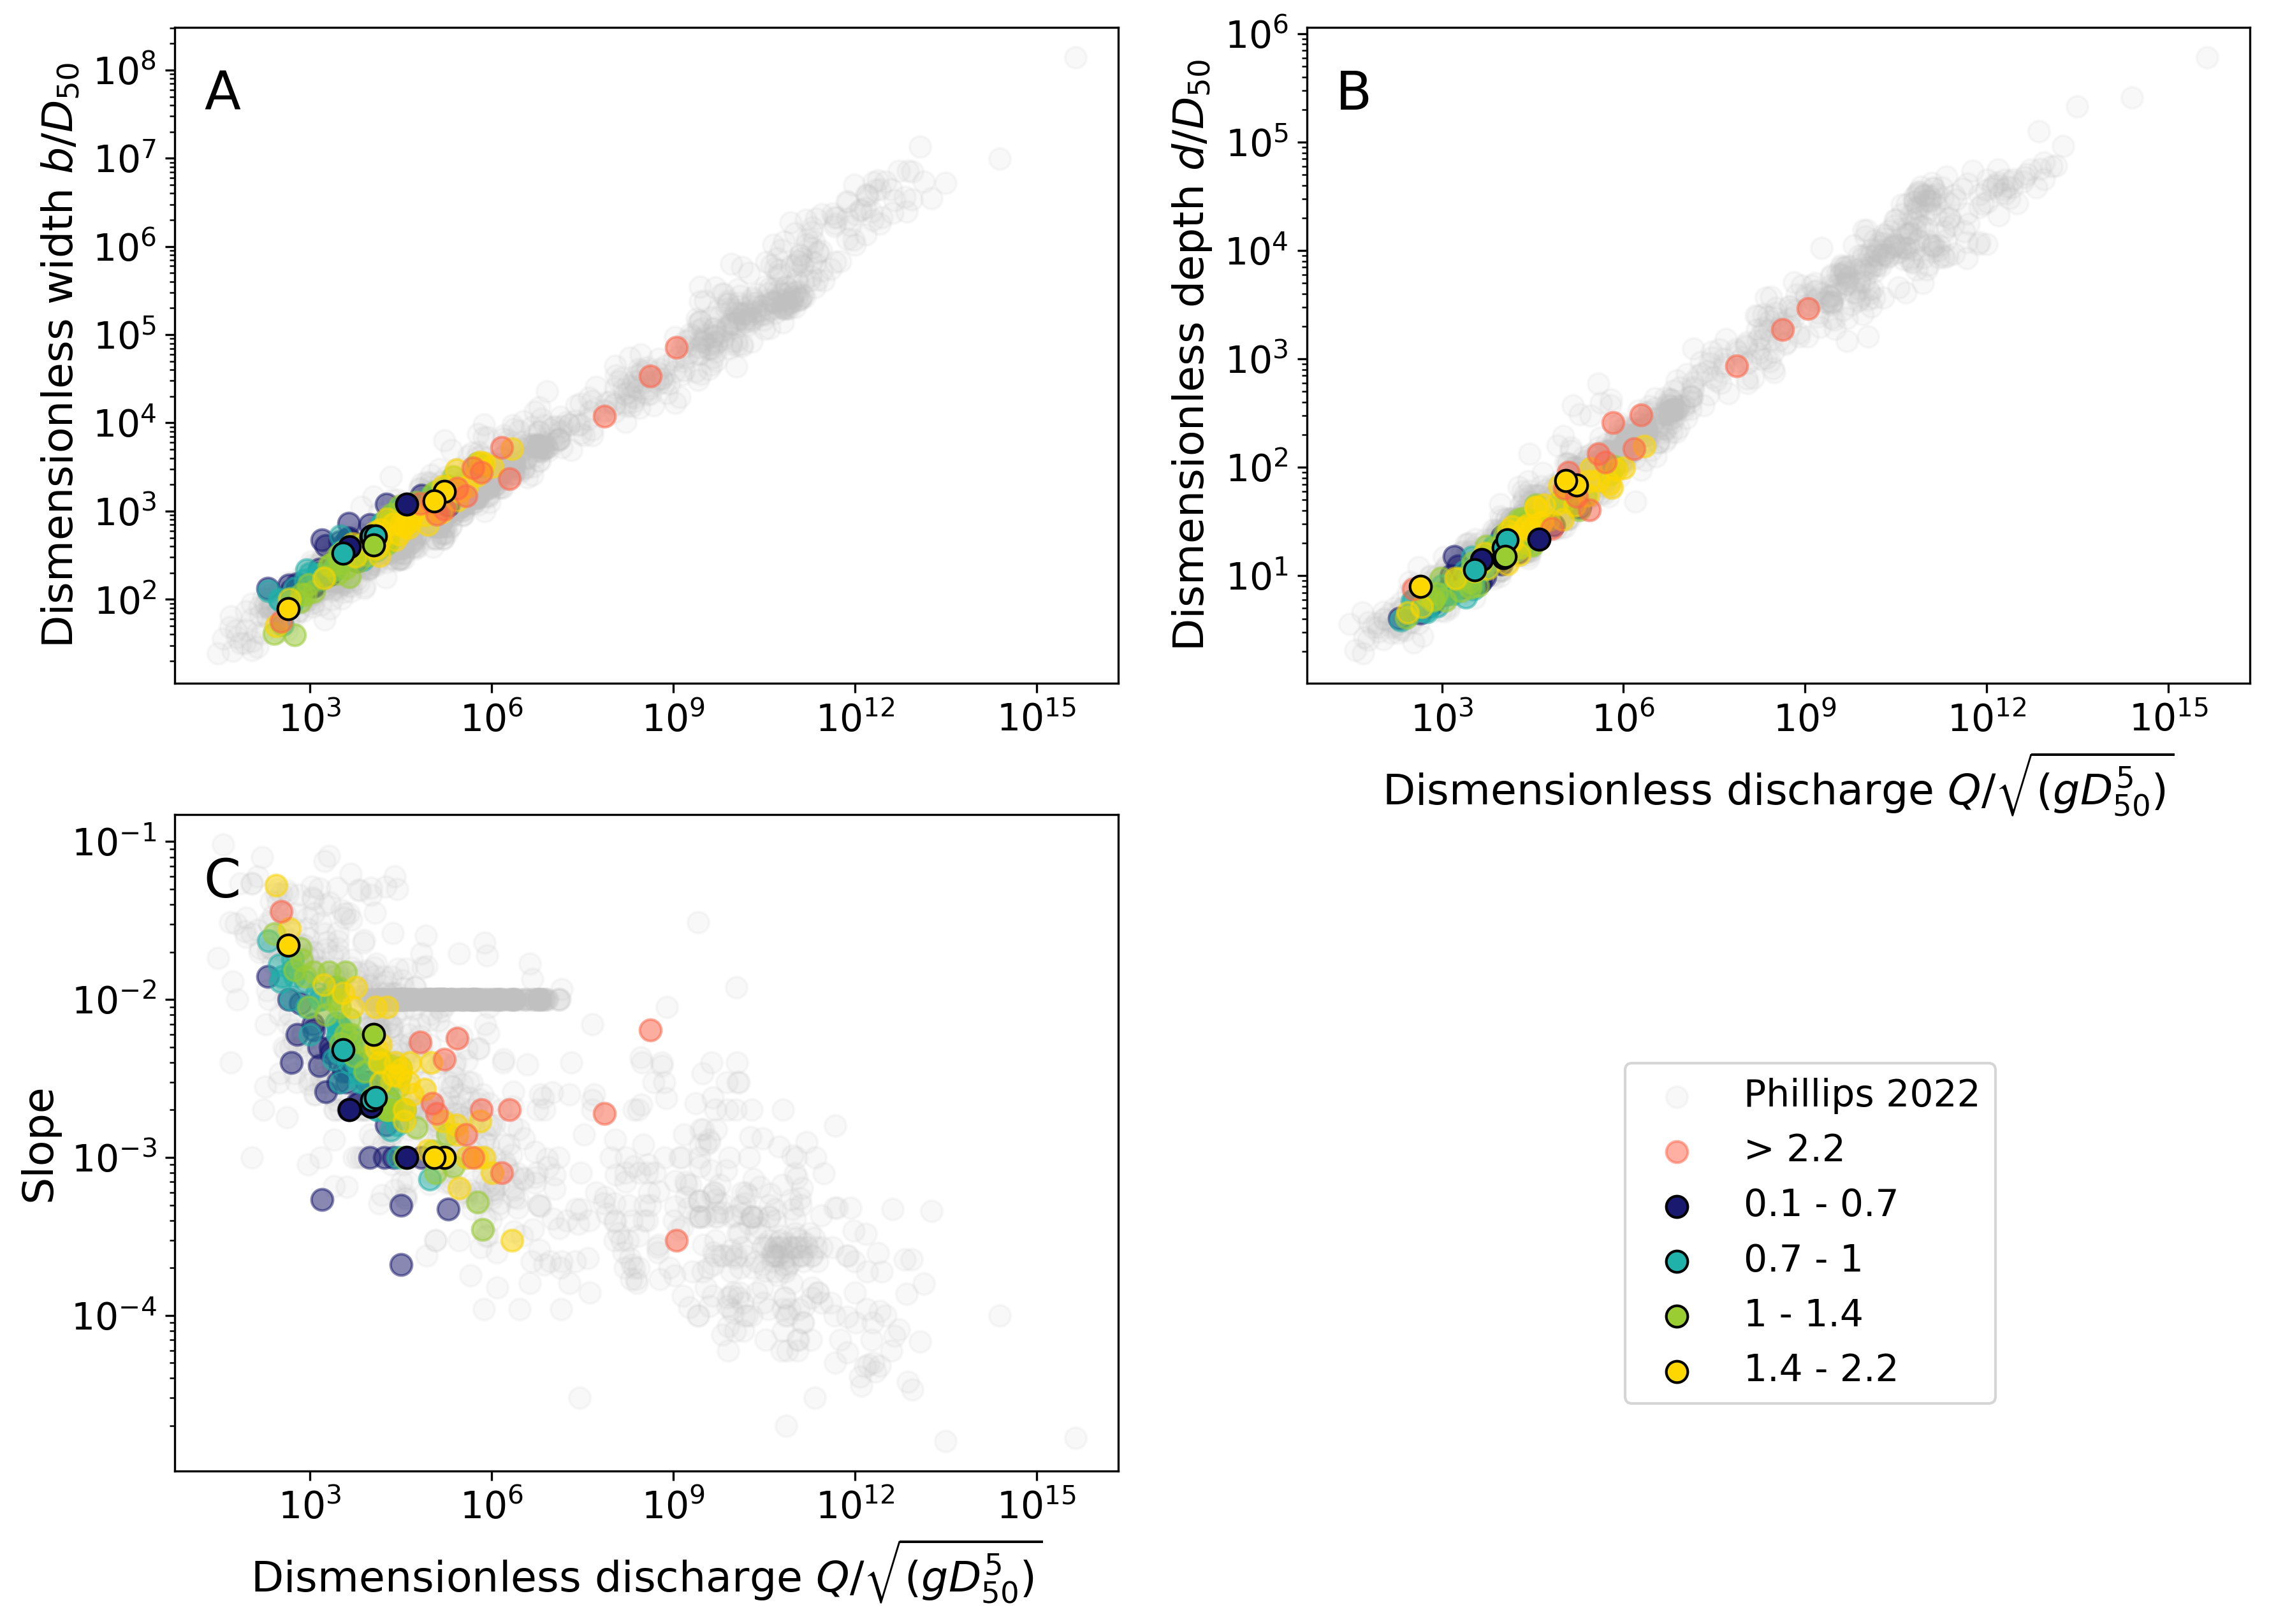

In [9]:
# great, now make a pretty figure

plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(2, 2, figsize = (14, 10), sharex = False, sharey = False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

axs[0, 0].scatter(global_data['Nondim Q'], global_data['Nondim W'], label = 'Phillips 2022', color = 'silver', alpha = 0.1, s = 65)
axs[0, 0].scatter(pfeiffer_data['Nondim Q'][0:33], pfeiffer_data['Nondim W'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Nondim Q'][33:78], pfeiffer_data['Nondim W'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Nondim Q'][78:126], pfeiffer_data['Nondim W'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Nondim Q'][126:161], pfeiffer_data['Nondim W'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Nondim Q'][161:], pfeiffer_data['Nondim W'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 0].scatter(low_tau['Nondim Q'], low_tau['Nondim W'], label = '0.1 - 0.7', color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 0].scatter(lowmed_tau['Nondim Q'], lowmed_tau['Nondim W'], label = '0.7 - 1', color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(highmed_tau['Nondim Q'], highmed_tau['Nondim W'], label = '1 - 1.4', color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(high_tau['Nondim Q'], high_tau['Nondim W'], label = '1.4 - 2.2', color = 'gold', s = 65, edgecolors = 'black')
axs[0, 0].set_ylabel('Dismensionless width $b/D_{50}$', fontsize = 16)
axs[0, 0].set_title('A', fontsize = 20, x=0.05,y=0.85)
axs[0, 0].tick_params(axis="x", labelsize=14) 
axs[0, 0].tick_params(axis="y", labelsize=14)
axs[0, 0].legend(fontsize = 14, bbox_to_anchor=(1.95, -.55))
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

#----------------------------------------------------------------
axs[0, 1].scatter(global_data['Nondim Q'], global_data['Nondim D'], color = 'silver', alpha = 0.1, s = 65)
axs[0, 1].scatter(pfeiffer_data['Nondim Q'][0:33], pfeiffer_data['Nondim D'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Nondim Q'][33:78], pfeiffer_data['Nondim D'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Nondim Q'][78:126], pfeiffer_data['Nondim D'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Nondim Q'][126:161], pfeiffer_data['Nondim D'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Nondim Q'][161:], pfeiffer_data['Nondim D'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 1].scatter(low_tau['Nondim Q'], low_tau['Nondim D'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 1].scatter(lowmed_tau['Nondim Q'], lowmed_tau['Nondim D'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(highmed_tau['Nondim Q'], highmed_tau['Nondim D'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(high_tau['Nondim Q'], high_tau['Nondim D'], color = 'gold', s = 65, edgecolors = 'black')
axs[0, 1].set_xlabel('Dismensionless discharge $Q/\sqrt{(g D_{50}^5)}$', fontsize = 16)
axs[0, 1].set_ylabel('Dismensionless depth $d/D_{50}$', fontsize = 16)
axs[0, 1].set_title('B', fontsize = 20, x=0.05,y=0.85)
axs[0, 1].tick_params(axis="x", labelsize=14) 
axs[0, 1].tick_params(axis="y", labelsize=14)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

#---------------------------------------------------------------
axs[1, 0].scatter(global_data['Nondim Q'], global_data['Slope'], color = 'silver', alpha = 0.1, s = 65)
axs[1, 0].scatter(pfeiffer_data['Nondim Q'][0:33], pfeiffer_data['Slope'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Nondim Q'][33:78], pfeiffer_data['Slope'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Nondim Q'][78:126], pfeiffer_data['Slope'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Nondim Q'][126:161], pfeiffer_data['Slope'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Nondim Q'][161:], pfeiffer_data['Slope'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[1, 0].scatter(low_tau['Nondim Q'], low_tau['Slope'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[1, 0].scatter(lowmed_tau['Nondim Q'], lowmed_tau['Slope'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(highmed_tau['Nondim Q'], highmed_tau['Slope'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(high_tau['Nondim Q'], high_tau['Slope'], color = 'gold', s = 65, edgecolors = 'black')
axs[1, 0].set_xlabel('Dismensionless discharge $Q/\sqrt{(g D_{50}^5)}$', fontsize = 16)
axs[1, 0].set_ylabel('Slope', fontsize = 16)
axs[1, 0].set_title('C', fontsize = 20, x=0.05,y=0.85)
axs[1, 0].tick_params(axis="x", labelsize=14) 
axs[1, 0].tick_params(axis="y", labelsize=14)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

axs[1,1].set_visible(False) 

plt.savefig('pfeiffer phillips comparison.png', bbox_inches='tight')
plt.show()

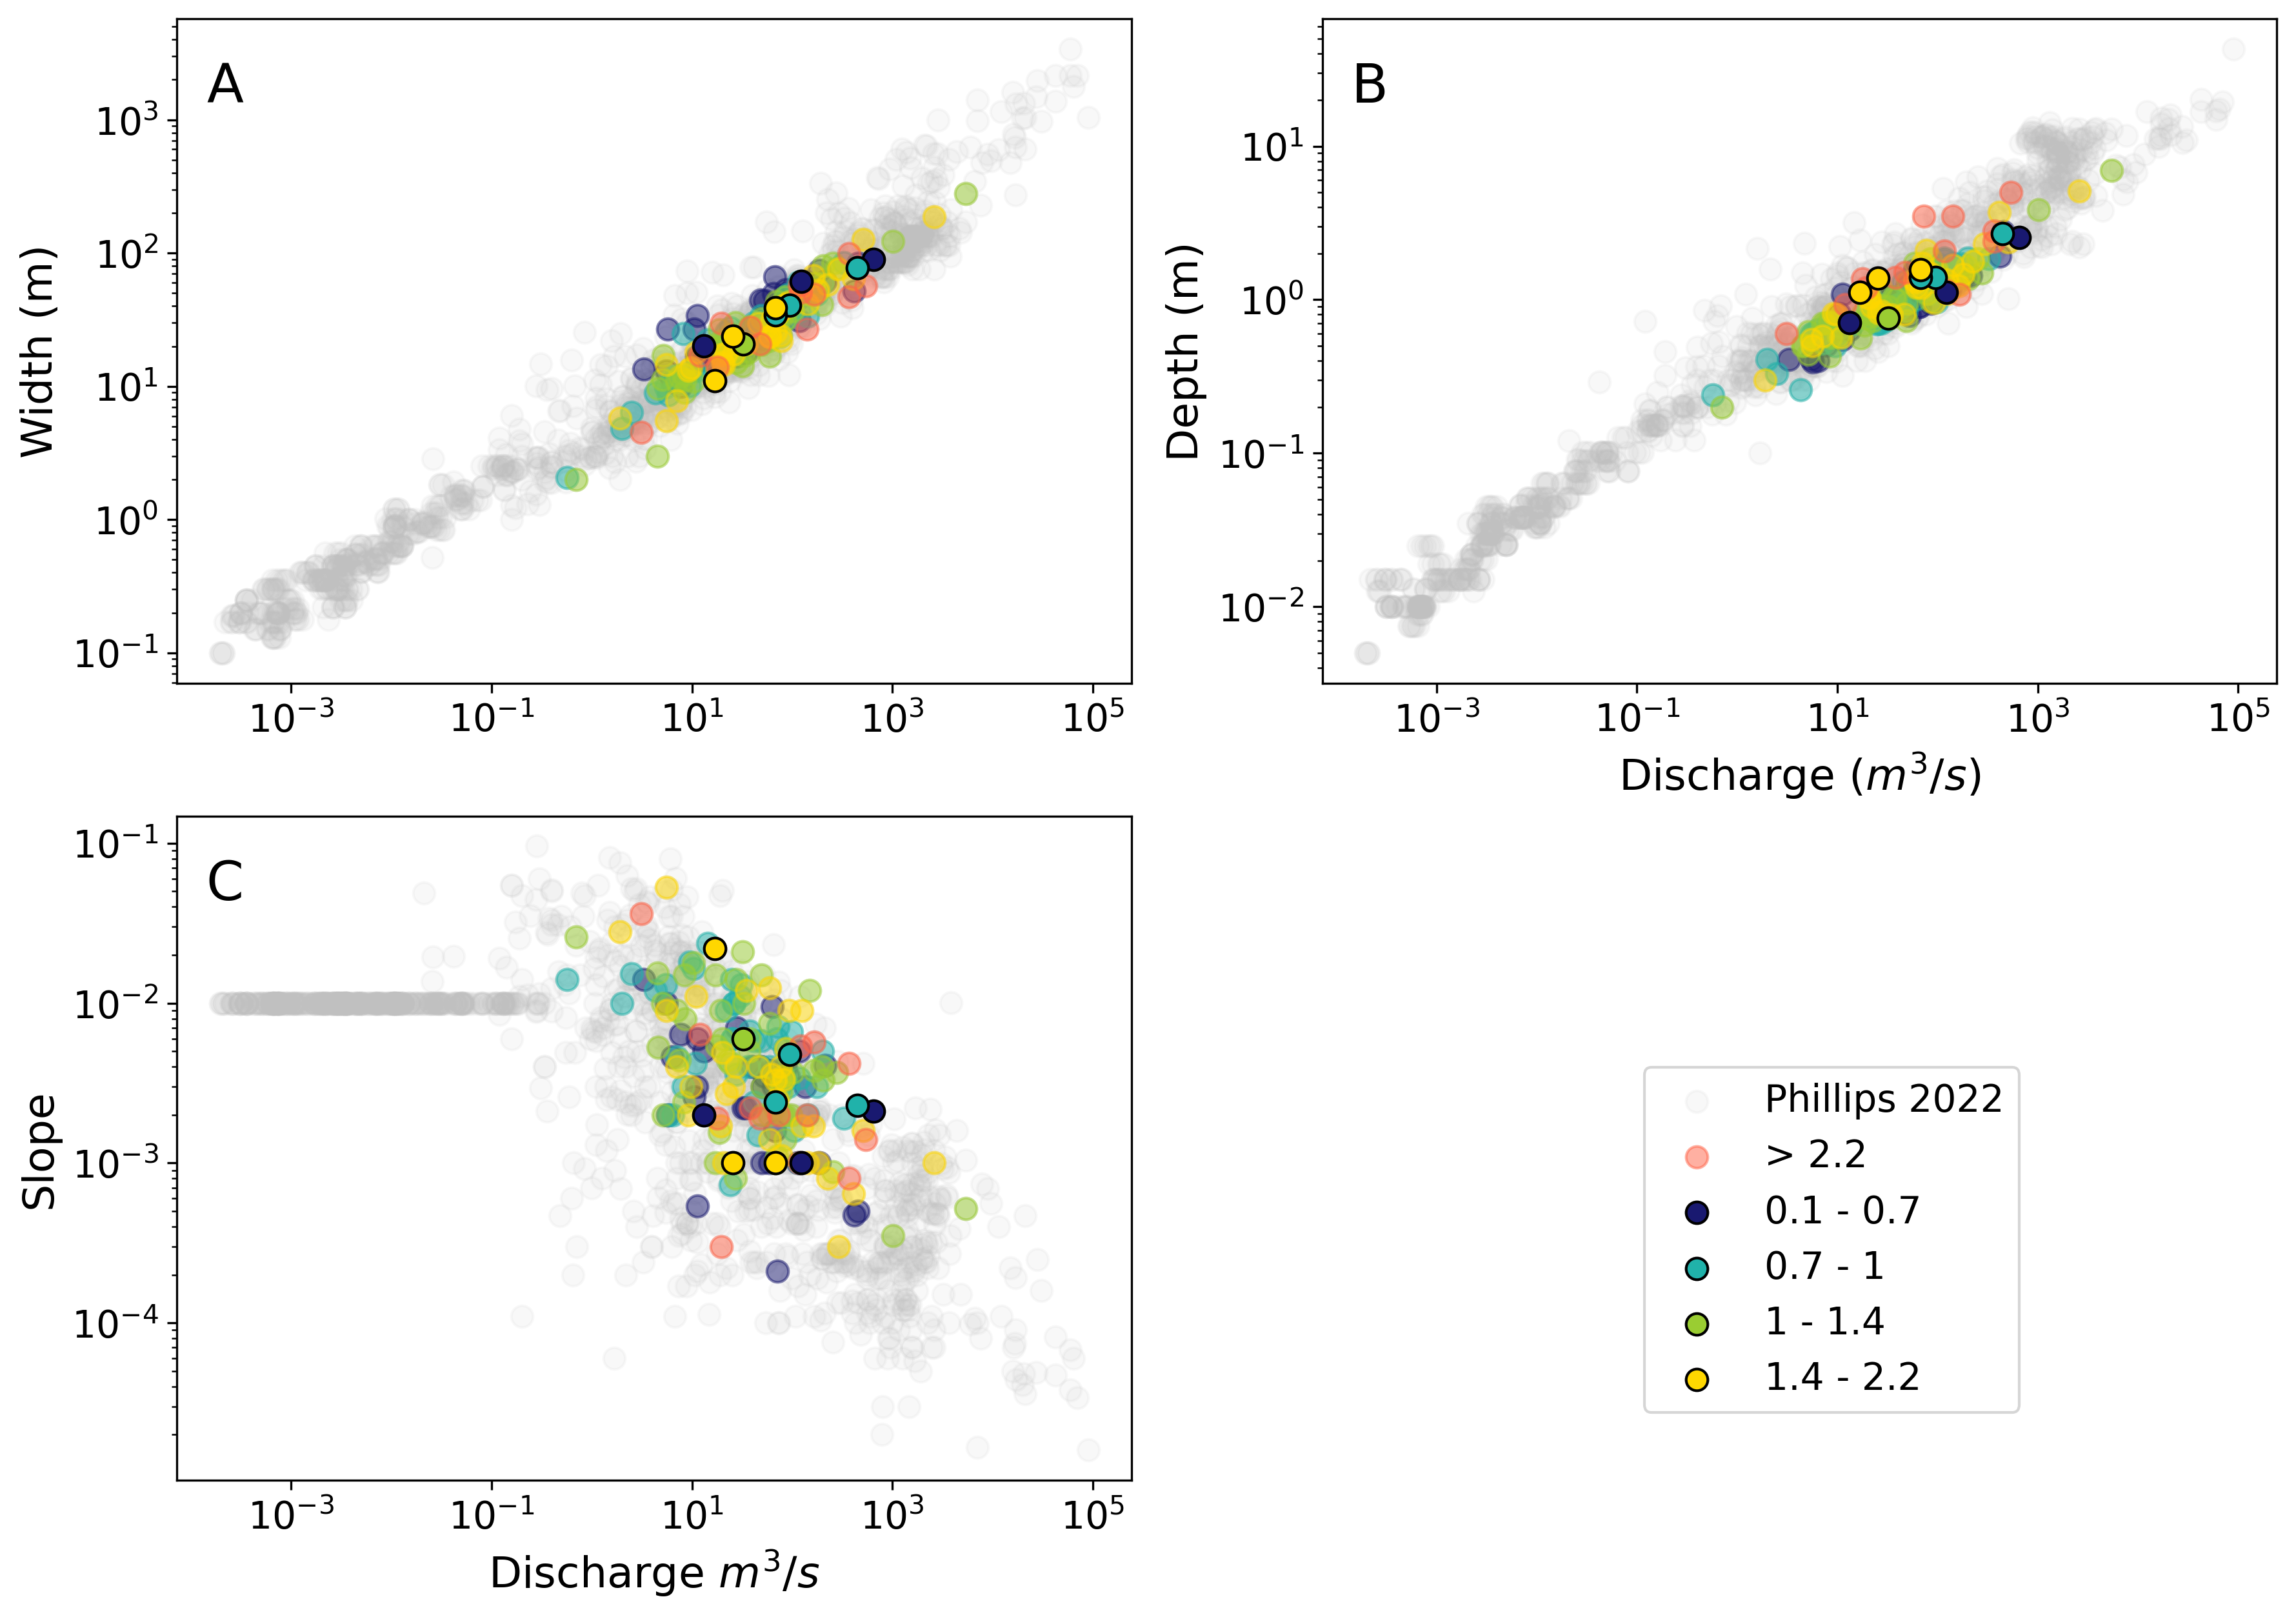

In [10]:
# great, now make a pretty figure

plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(2, 2, figsize = (14, 10), sharex = False, sharey = False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

axs[0, 0].scatter(global_data['Discharge (m3/s)'], global_data['Width (m)'], label = 'Phillips 2022', color = 'silver', alpha = 0.1, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Width (m)'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Width (m)'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Width (m)'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Width (m)'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Width (m)'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 0].scatter(low_tau['Discharge (m3/s)'], low_tau['Width (m)'], label = '0.1 - 0.7', color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 0].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Width (m)'], label = '0.7 - 1', color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Width (m)'], label = '1 - 1.4', color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(high_tau['Discharge (m3/s)'], high_tau['Width (m)'], label = '1.4 - 2.2', color = 'gold', s = 65, edgecolors = 'black')
axs[0, 0].set_ylabel('Width (m)', fontsize = 16)
axs[0, 0].set_title('A', fontsize = 20, x=0.05,y=0.85)
axs[0, 0].tick_params(axis="x", labelsize=14) 
axs[0, 0].tick_params(axis="y", labelsize=14)
axs[0, 0].legend(fontsize = 14, bbox_to_anchor=(1.95, -.55))
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')

#----------------------------------------------------------------
axs[0, 1].scatter(global_data['Discharge (m3/s)'], global_data['Depth (m)'], color = 'silver', alpha = 0.1, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Depth (m)'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Depth (m)'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Depth (m)'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Depth (m)'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Depth (m)'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 1].scatter(low_tau['Discharge (m3/s)'], low_tau['Depth (m)'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 1].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Depth (m)'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Depth (m)'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(high_tau['Discharge (m3/s)'], high_tau['Depth (m)'], color = 'gold', s = 65, edgecolors = 'black')
axs[0, 1].set_xlabel('Discharge ($m^3/s$)', fontsize = 16)
axs[0, 1].set_ylabel('Depth (m)', fontsize = 16)
axs[0, 1].set_title('B', fontsize = 20, x=0.05,y=0.85)
axs[0, 1].tick_params(axis="x", labelsize=14) 
axs[0, 1].tick_params(axis="y", labelsize=14)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')

#---------------------------------------------------------------
axs[1, 0].scatter(global_data['Discharge (m3/s)'], global_data['Slope'], color = 'silver', alpha = 0.1, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Slope'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Slope'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Slope'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Slope'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Slope'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[1, 0].scatter(low_tau['Discharge (m3/s)'], low_tau['Slope'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[1, 0].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Slope'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Slope'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(high_tau['Discharge (m3/s)'], high_tau['Slope'], color = 'gold', s = 65, edgecolors = 'black')
axs[1, 0].set_xlabel('Discharge $m^3/s$', fontsize = 16)
axs[1, 0].set_ylabel('Slope', fontsize = 16)
axs[1, 0].set_title('C', fontsize = 20, x=0.05,y=0.85)
axs[1, 0].tick_params(axis="x", labelsize=14) 
axs[1, 0].tick_params(axis="y", labelsize=14)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')

axs[1,1].set_visible(False) 

plt.savefig('pfeiffer phillips comparison dimensional log.png', bbox_inches='tight')
plt.show()

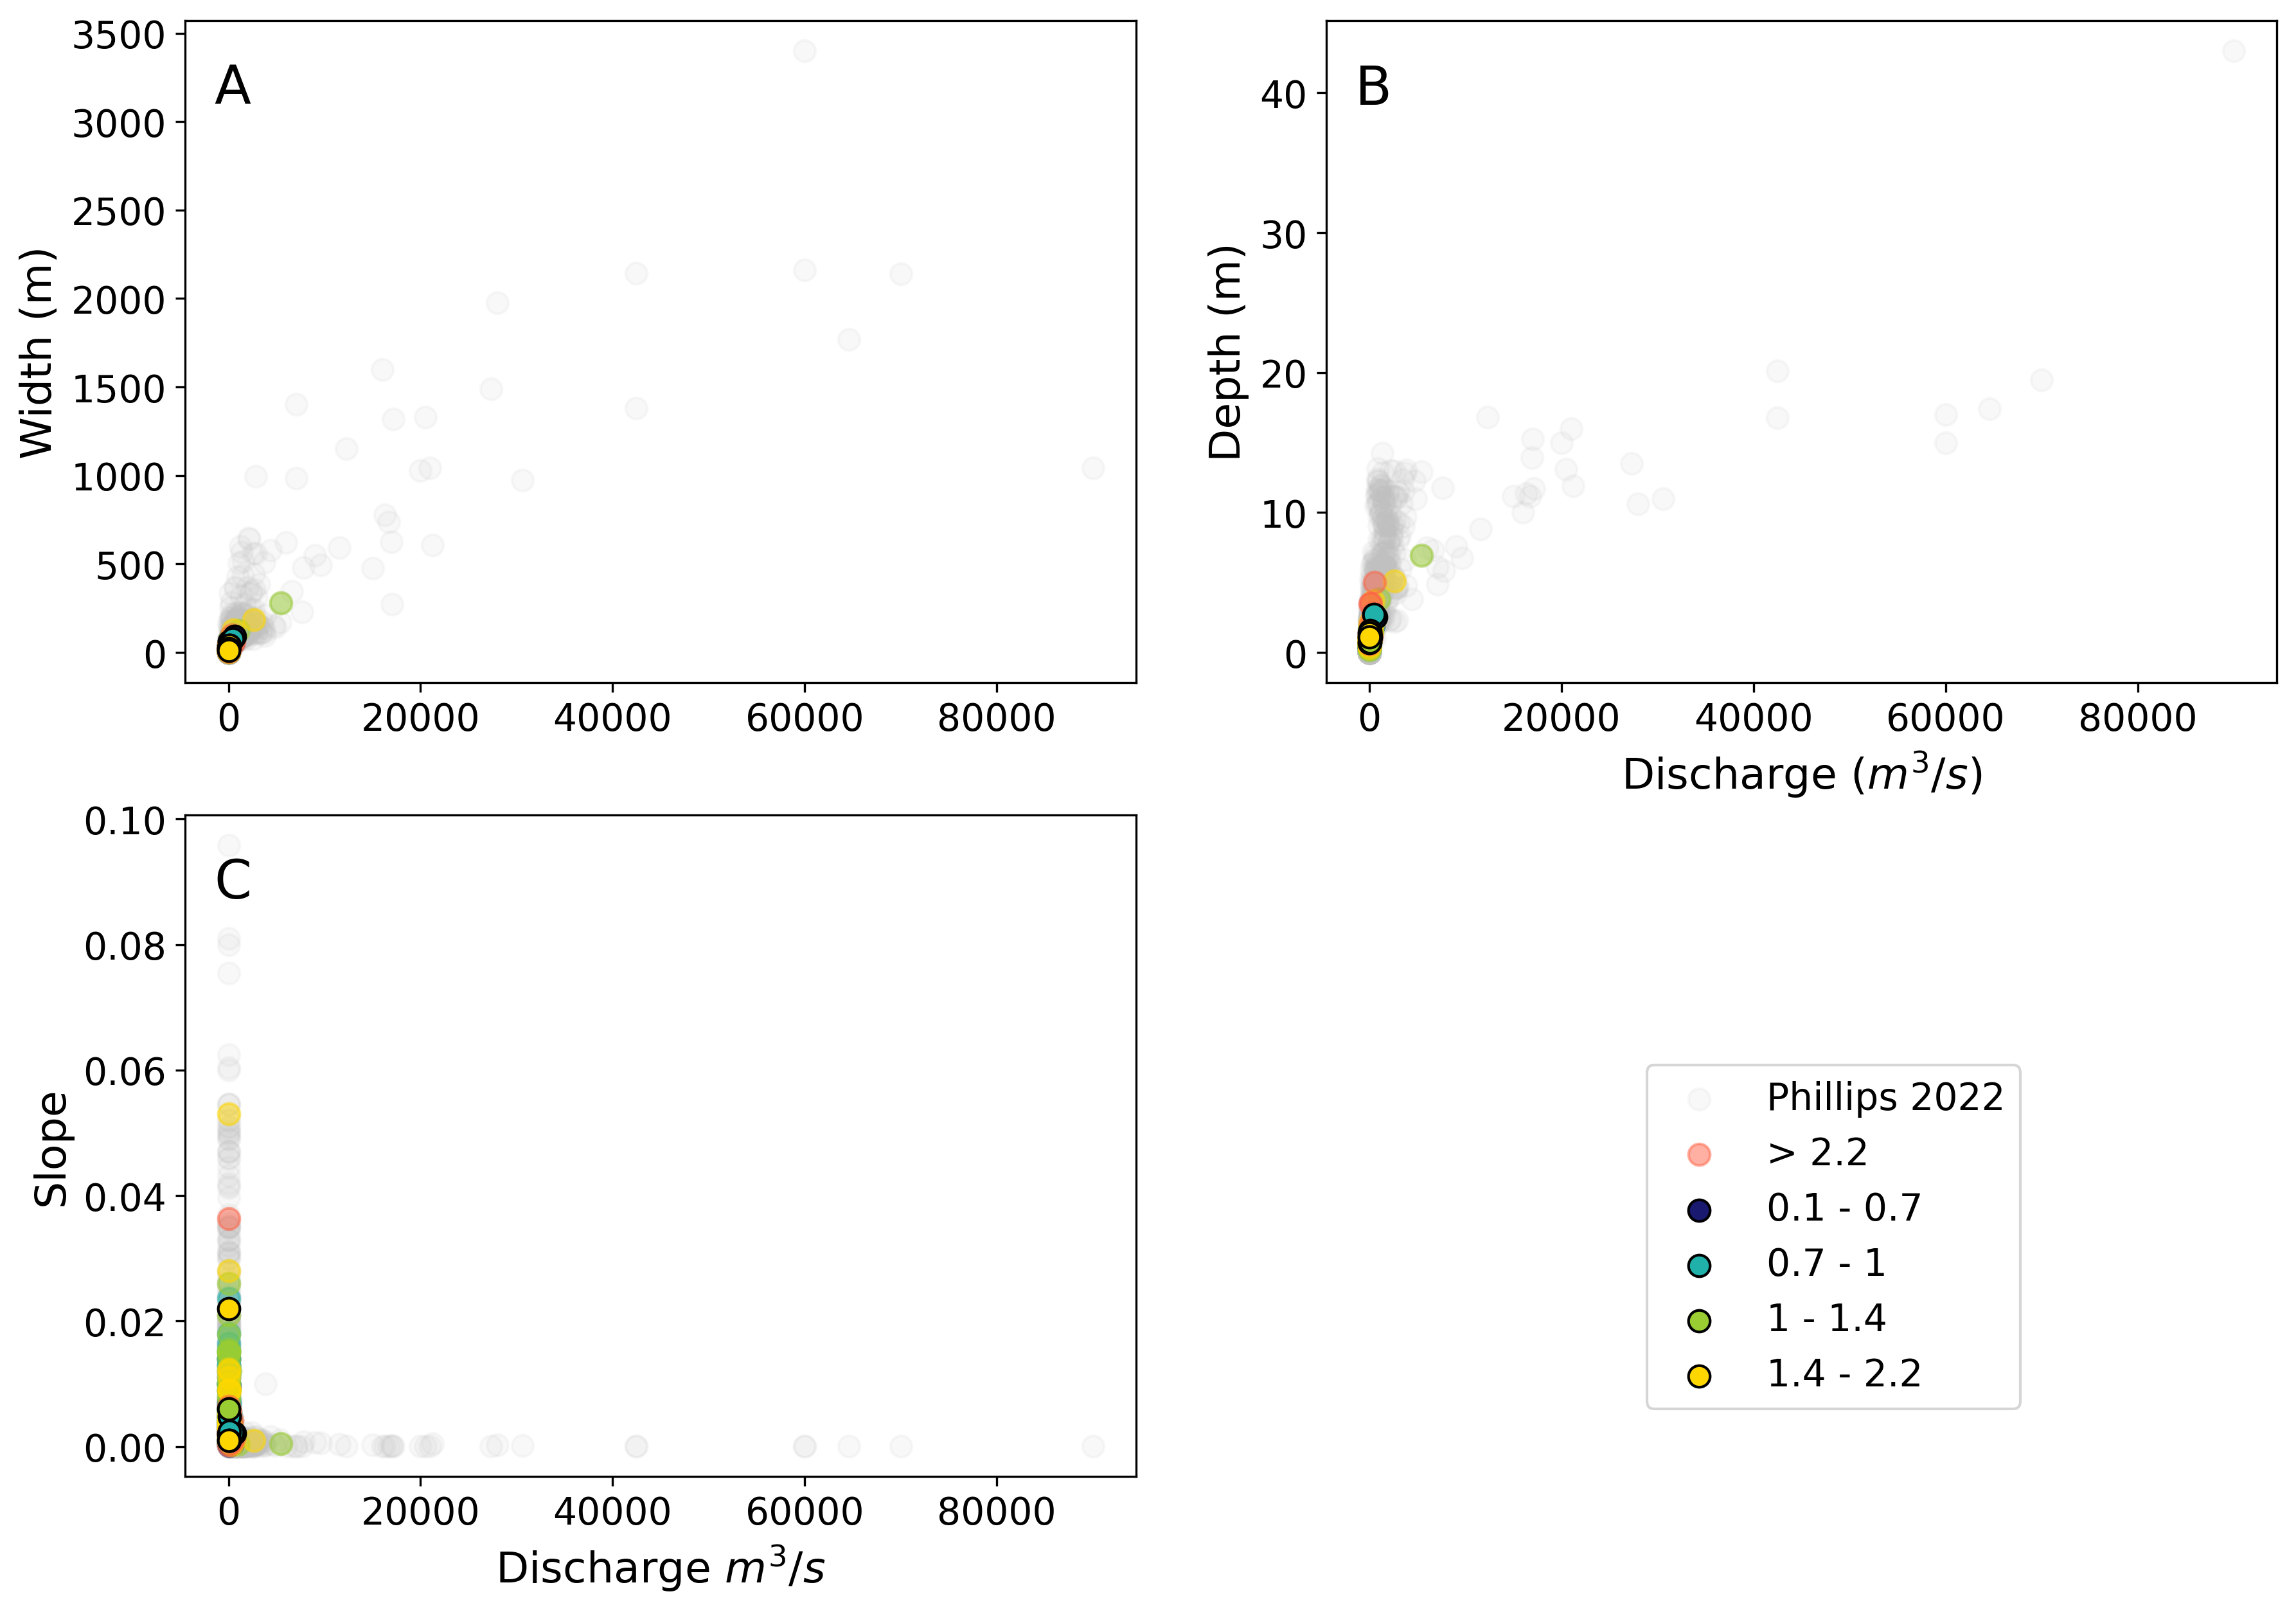

In [11]:
# great, now make a pretty figure

plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(2, 2, figsize = (14, 10), sharex = False, sharey = False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

axs[0, 0].scatter(global_data['Discharge (m3/s)'], global_data['Width (m)'], label = 'Phillips 2022', color = 'silver', alpha = 0.1, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Width (m)'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Width (m)'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Width (m)'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Width (m)'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 0].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Width (m)'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 0].scatter(low_tau['Discharge (m3/s)'], low_tau['Width (m)'], label = '0.1 - 0.7', color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 0].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Width (m)'], label = '0.7 - 1', color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Width (m)'], label = '1 - 1.4', color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 0].scatter(high_tau['Discharge (m3/s)'], high_tau['Width (m)'], label = '1.4 - 2.2', color = 'gold', s = 65, edgecolors = 'black')
axs[0, 0].set_ylabel('Width (m)', fontsize = 16)
axs[0, 0].set_title('A', fontsize = 20, x=0.05,y=0.85)
axs[0, 0].tick_params(axis="x", labelsize=14) 
axs[0, 0].tick_params(axis="y", labelsize=14)
axs[0, 0].legend(fontsize = 14, bbox_to_anchor=(1.95, -.55))
# axs[0, 0].set_xscale('log')
# axs[0, 0].set_yscale('log')

#----------------------------------------------------------------
axs[0, 1].scatter(global_data['Discharge (m3/s)'], global_data['Depth (m)'], color = 'silver', alpha = 0.1, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Depth (m)'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Depth (m)'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Depth (m)'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Depth (m)'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[0, 1].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Depth (m)'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[0, 1].scatter(low_tau['Discharge (m3/s)'], low_tau['Depth (m)'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[0, 1].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Depth (m)'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Depth (m)'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[0, 1].scatter(high_tau['Discharge (m3/s)'], high_tau['Depth (m)'], color = 'gold', s = 65, edgecolors = 'black')
axs[0, 1].set_xlabel('Discharge ($m^3/s$)', fontsize = 16)
axs[0, 1].set_ylabel('Depth (m)', fontsize = 16)
axs[0, 1].set_title('B', fontsize = 20, x=0.05,y=0.85)
axs[0, 1].tick_params(axis="x", labelsize=14) 
axs[0, 1].tick_params(axis="y", labelsize=14)
# axs[0, 1].set_xscale('log')
# axs[0, 1].set_yscale('log')

#---------------------------------------------------------------
axs[1, 0].scatter(global_data['Discharge (m3/s)'], global_data['Slope'], color = 'silver', alpha = 0.1, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][0:33], pfeiffer_data['Slope'][0:33], color = 'midnightblue', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][33:78], pfeiffer_data['Slope'][33:78], color = 'lightseagreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][78:126], pfeiffer_data['Slope'][78:126], color = 'yellowgreen', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][126:161], pfeiffer_data['Slope'][126:161], color = 'gold', alpha = 0.5, s = 65)
axs[1, 0].scatter(pfeiffer_data['Discharge (m3/s)'][161:], pfeiffer_data['Slope'][161:], label = '> 2.2', color = 'tomato', alpha = 0.5, s = 65)
axs[1, 0].scatter(low_tau['Discharge (m3/s)'], low_tau['Slope'], color = 'midnightblue', s = 65, edgecolors = 'black')
axs[1, 0].scatter(lowmed_tau['Discharge (m3/s)'], lowmed_tau['Slope'], color = 'lightseagreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(highmed_tau['Discharge (m3/s)'], highmed_tau['Slope'], color = 'yellowgreen', s = 65, edgecolors = 'black')
axs[1, 0].scatter(high_tau['Discharge (m3/s)'], high_tau['Slope'], color = 'gold', s = 65, edgecolors = 'black')
axs[1, 0].set_xlabel('Discharge $m^3/s$', fontsize = 16)
axs[1, 0].set_ylabel('Slope', fontsize = 16)
axs[1, 0].set_title('C', fontsize = 20, x=0.05,y=0.85)
axs[1, 0].tick_params(axis="x", labelsize=14) 
axs[1, 0].tick_params(axis="y", labelsize=14)
# axs[1, 0].set_xscale('log')
# axs[1, 0].set_yscale('log')

axs[1,1].set_visible(False) 

plt.savefig('pfeiffer phillips comparison dimensional linear.png', bbox_inches='tight')
plt.show()